绘制图像直方图

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

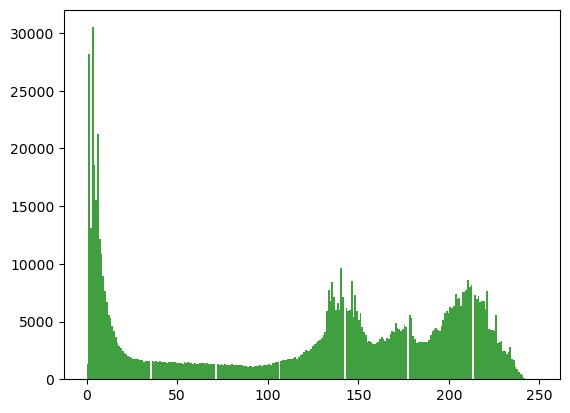

In [2]:
img=np.array(Image.open('panda.jpg').convert('L'))

arr=img.flatten()
plt.hist(arr, bins=256, facecolor='green', alpha=0.75)  
plt.show()

实现直方图均衡

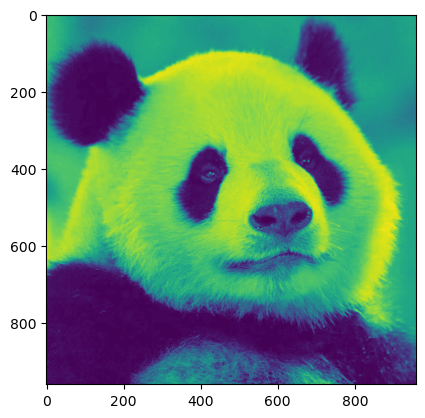

In [3]:
import cv2

img = cv2.imread("panda.jpg")
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

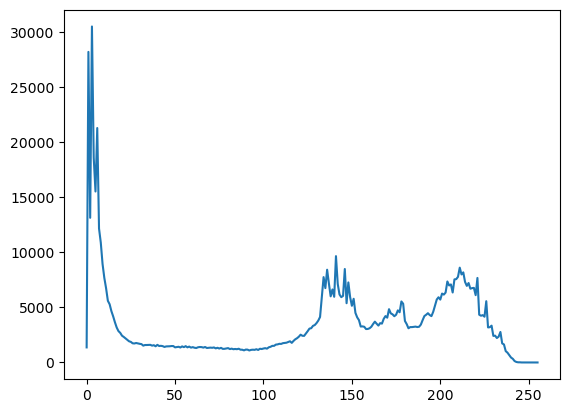

In [5]:
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt.plot(hist)

In [6]:
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
equalized_image = np.interp(gray_image.flatten(), np.arange(256), cdf_normalized).reshape(gray_image.shape)

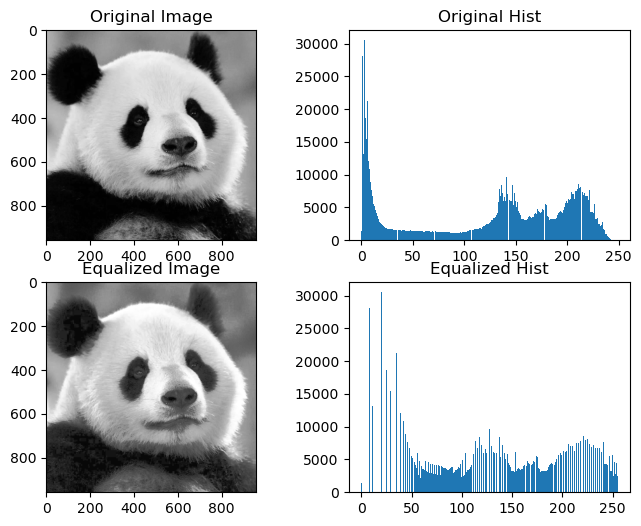

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('panda.jpg', 0)

# 使用直方图均衡化函数
equalized_image = cv2.equalizeHist(image)

plt.figure(figsize=(8,6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.hist(image.ravel(),256)
plt.title('Original Hist')


plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
plt.hist(equalized_image.ravel(),256)
plt.title('Equalized Hist')

# 显示图像
plt.show()

In [11]:
def histogram_matching(source, template):
    source_hist = cv2.calcHist([source], [0], None, [256], [0,256])
    template_hist = cv2.calcHist([template], [0], None, [256], [0,256])

    source_cdf = source_hist.cumsum()
    template_cdf = template_hist.cumsum()

    lut = np.interp(source_cdf, template_cdf, np.arange(256))
    result = cv2.LUT(source, lut)

    return result

In [21]:
source = cv2.imread('source.jpg', 0)
template = cv2.imread('panda.jpg', 0)

result = histogram_matching(source, template)
cv2.imwrite('result_image.jpg', result)
result = cv2.imread('result_image.jpg', 0)

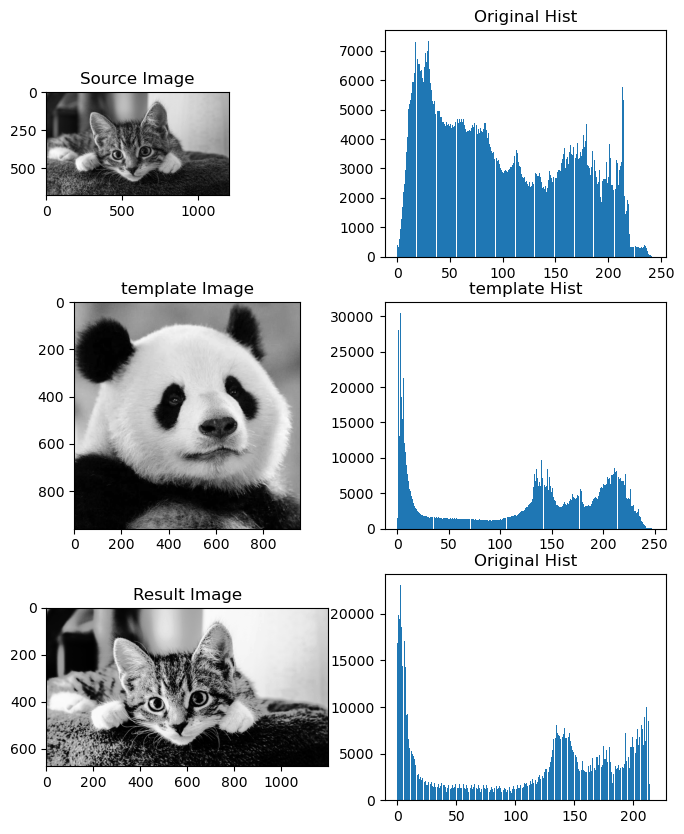

In [22]:
plt.figure(figsize=(8,10))
plt.subplot(3, 3, 1)
plt.imshow(source, cmap='gray')
plt.title('Source Image')
plt.subplot(3, 2, 2)
plt.hist(source.ravel(),256)
plt.title('Original Hist')
plt.subplot(3, 2, 5)
plt.imshow(result, cmap='gray')
plt.title('Result Image')
plt.subplot(3, 2, 6)
plt.hist(result.ravel(),256)
plt.title('Original Hist')
plt.subplot(3, 2, 3)
plt.imshow(template, cmap='gray')
plt.title('template Image')
plt.subplot(3, 2, 4)
plt.hist(template.ravel(),256)
plt.title('template Hist')
plt.show()